In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group # Used for random rotation of covariance matrix
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [93]:
config= pd.read_csv('../bucket/config/config.csv',index_col=0)
embeddings_without_ChatGPT_path=config.loc['iphone6_embeddings_dataset_without_ChatGPT'][0]
X_emb= pd.read_csv(embeddings_without_ChatGPT_path,index_col=0)
X_emb

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,-0.016837,-0.009745,0.010138,-0.021534,-0.000880,0.011593,-0.037843,-0.002905,-0.007329,-0.001585,...,0.013460,-0.019964,0.037979,-0.026975,-0.018665,0.042499,-0.032348,-0.025811,0.014090,-0.028098
1,-0.009223,0.003645,-0.018278,-0.020371,-0.017790,0.013200,-0.033320,-0.003718,-0.020846,-0.028478,...,0.011365,-0.030529,0.041050,-0.018669,-0.027181,0.003164,-0.016562,-0.019632,0.001014,-0.023804
2,-0.016064,0.003222,0.007999,-0.026997,-0.015285,0.012310,-0.008106,-0.000991,0.001728,-0.013532,...,-0.002992,-0.029523,0.017286,-0.043115,-0.023666,0.009019,-0.009080,0.001371,0.007011,-0.026715
3,-0.027700,-0.004357,0.001510,-0.017028,0.009624,-0.000192,-0.035545,-0.010734,0.000684,-0.012009,...,-0.005208,-0.035573,0.038799,-0.025383,-0.014932,0.038110,-0.011471,-0.024722,0.002554,-0.025066
4,-0.028545,-0.010588,-0.011517,-0.039148,-0.015369,0.012543,-0.032933,-0.009836,-0.009963,-0.040695,...,0.023272,-0.011770,0.023610,-0.045448,-0.030233,0.015693,-0.007481,-0.006430,0.011256,-0.027238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,-0.023055,-0.005153,-0.005132,-0.026010,-0.003420,0.032830,-0.045641,-0.014289,-0.005653,-0.006927,...,0.010292,-0.032333,0.039401,-0.038849,-0.044399,0.033437,-0.016760,-0.019894,0.001972,-0.026355
3496,-0.022825,0.005792,-0.023225,-0.025265,-0.019801,0.012547,-0.021927,-0.005360,-0.016292,-0.020086,...,0.016605,-0.041029,0.028974,-0.029131,-0.026620,0.040201,-0.008995,-0.028560,0.015593,-0.016149
3497,-0.026935,-0.005614,-0.003453,-0.037434,-0.003752,0.020755,-0.014817,-0.008819,0.002262,-0.023683,...,0.013171,-0.026463,0.037272,-0.034789,-0.038001,0.034924,-0.003478,-0.023359,0.008826,-0.009521
3498,-0.027652,0.005769,0.015298,-0.030191,-0.006373,0.019875,-0.020091,0.006582,0.014839,-0.017890,...,0.005097,-0.028868,0.023791,-0.026572,-0.027450,0.037239,-0.002896,0.009283,0.006775,-0.028273


In [56]:
y = pd.read_csv(config.loc['iphone6_y_train_labled'][0])
X_train = pd.read_csv(config.loc['iphone6_x_train_labled'][0],index_col=0)
X_train=X_train.iloc[list(y.query('label==1').index)]
X = X_emb.loc[X_train.index]
y=y.query('label==1')

In [48]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X)

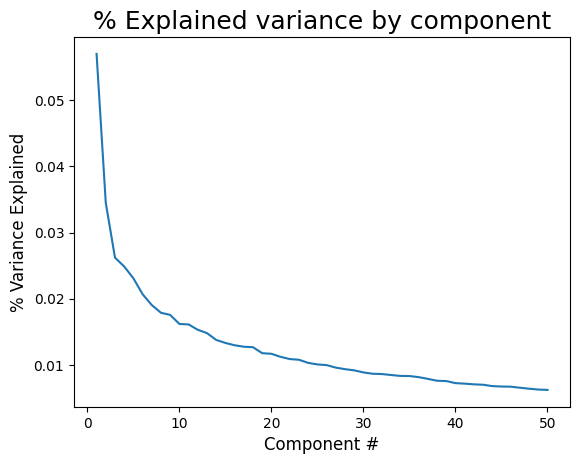

In [49]:
plt.plot(np.arange(1,51),pca.explained_variance_ratio_[0:50])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=12)
plt.ylabel("% Variance Explained",size=12)
plt.show()

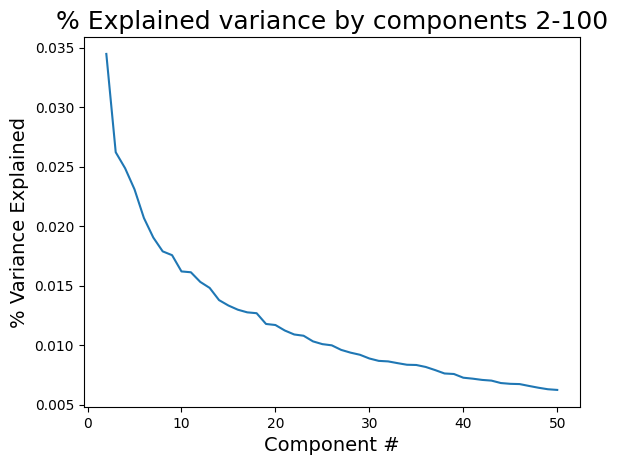

In [50]:
plt.plot(np.arange(2,51),pca.explained_variance_ratio_[1:50])
plt.title("% Explained variance by components 2-100",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

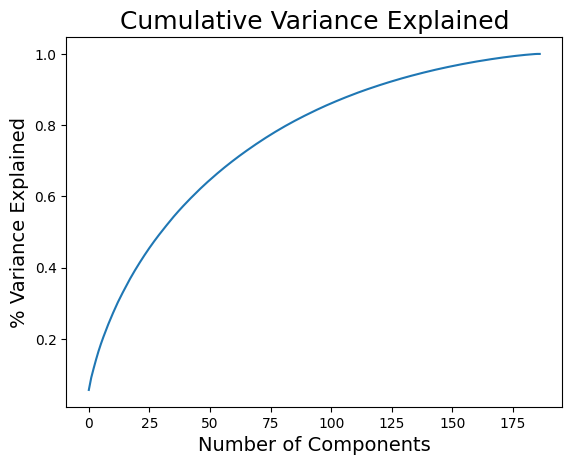

In [52]:
plt.plot(np.arange(0,187),np.cumsum(pca.explained_variance_ratio_[0:187]))
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

In [53]:
np.where(np.cumsum(pca.explained_variance_ratio_) >=.95)[0][0]

140

/home/oneking/Documents/Github_Projects/twitter_pf_NLP/venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


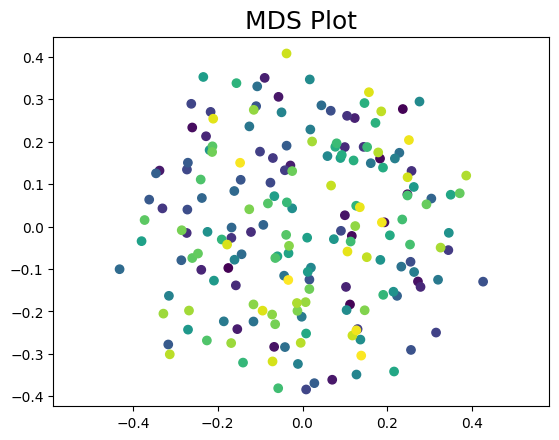

In [95]:
# MDS can be slow when n is large
mds = MDS(n_components=4,verbose=1,eps=1e-5)
mds.fit(X)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=np.arange(187))
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 187 samples in 0.001s...
[t-SNE] Computed neighbors for 187 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 187 / 187
[t-SNE] Mean sigma: 0.141041
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.908756
[t-SNE] KL divergence after 1000 iterations: 0.708830


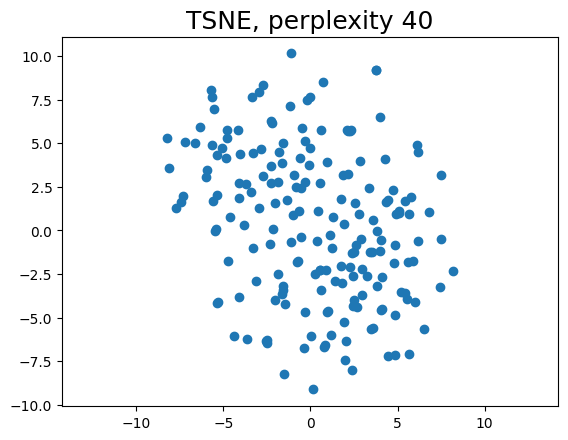

In [58]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(X)
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 187 samples in 0.000s...
[t-SNE] Computed neighbors for 187 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 187 / 187
[t-SNE] Mean sigma: 0.146601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.566093
[t-SNE] KL divergence after 1000 iterations: 0.785674


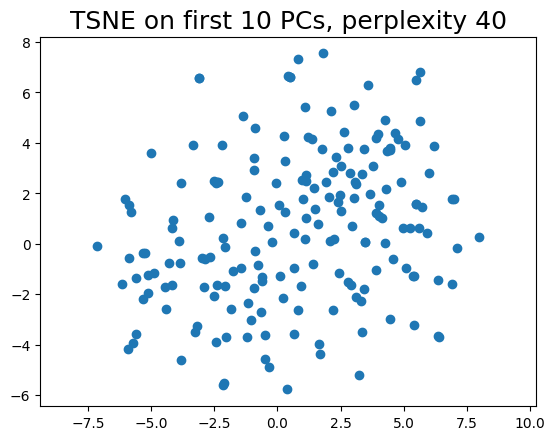

In [60]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(z[:,0:140])
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE on first 10 PCs, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 187 samples in 0.000s...
[t-SNE] Computed neighbors for 187 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 187 / 187
[t-SNE] Mean sigma: 0.130683
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.374435
[t-SNE] KL divergence after 1000 iterations: 1.059620


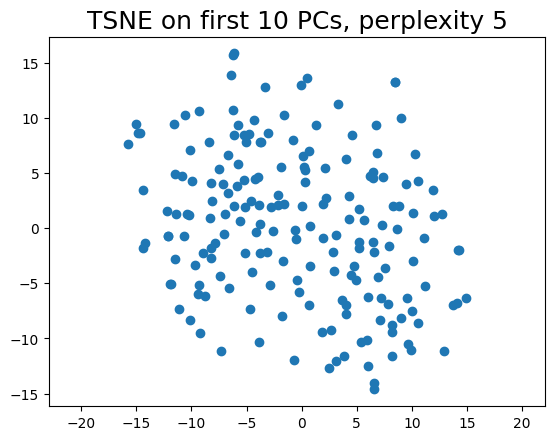

In [70]:
tsne = TSNE(n_components=2,verbose=1,perplexity=20)
z_tsne = tsne.fit_transform(z[:,0:140])
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE on first 10 PCs, perplexity 5",size=18)
plt.axis("equal")
plt.show()

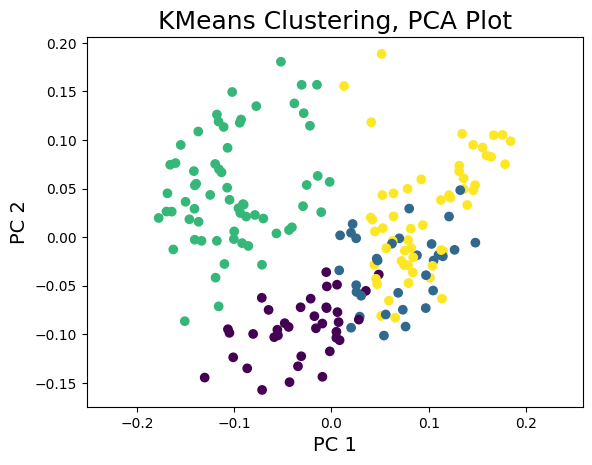

In [96]:
kmeans = KMeans(n_clusters=4,n_init=10)
y = kmeans.fit_predict(X)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

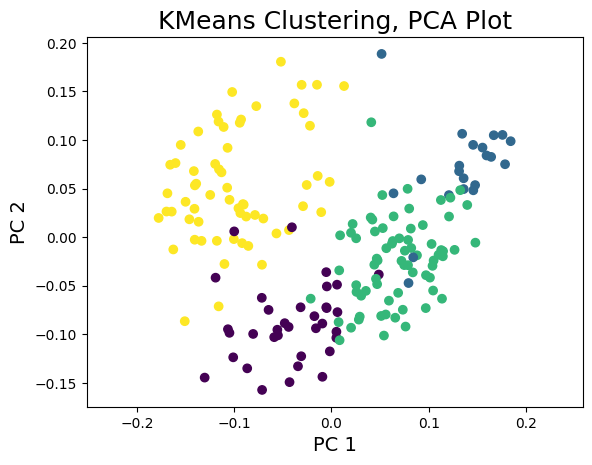

In [83]:
# More initializations
kmeans = KMeans(n_clusters=4,n_init=100)
y = kmeans.fit_predict(z)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

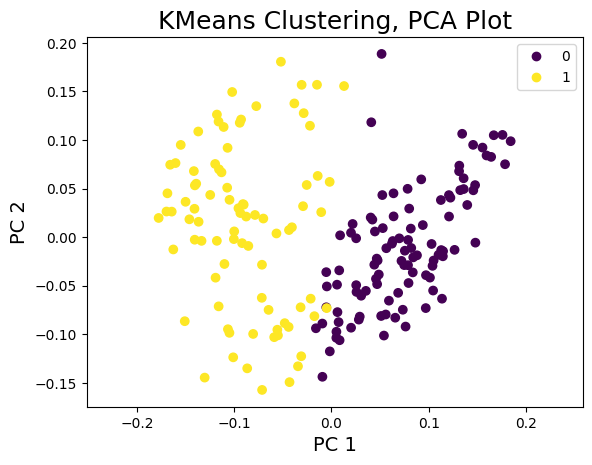

In [185]:
# Reduced dimension
kmeans = KMeans(n_clusters=2,n_init=100)
y = kmeans.fit_predict(z[:,0:140])
centers=kmeans.cluster_centers_
scatter=plt.scatter(z[:,0],z[:,1],c=y)
plt.legend(handles=scatter.legend_elements()[0],labels=set(y))
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

In [186]:
ps_centroids=[]
for i,item in enumerate(centers.tolist()):
    # print(item)
    prev=float('infinity')
    min_j=0
    for j,post in enumerate(z[:,0:140].tolist()):
        # print(item[:5],'|',post[:5])
        diff=np.sum((centers[i]-z[j,0:140])**2)
        diff=min(diff,prev)
        if diff!=prev:
            min_j=j
        prev=diff
    ps_centroids.append(min_j)

In [187]:
X_train.iloc[ps_centroids].text.tolist()

['got the iphone 6 its too advanced for me',
 'apple will iphone 6 bendgate take a bite out of apple ...  the iphone 6 and 6 plus other devices were unaf  httpgooglnuo0yd']

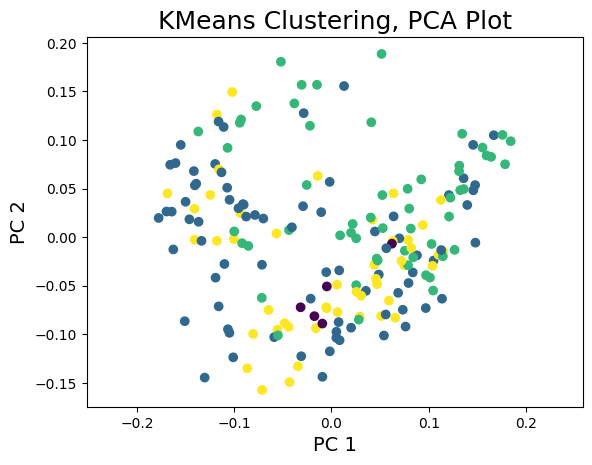

In [155]:
kmed = KMedoids(n_clusters=4,max_iter=1000,init='k-medoids++')
y = kmed.fit_predict(z[:,:])
centers=kmed.cluster_centers_
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()